<a href="https://colab.research.google.com/github/sathvika-vegiraju/svegira1_MachineLearning/blob/main/AMLassignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 100 | Validation samples: 10000
Epoch 1/6


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.4785 - loss: 0.6936 - val_accuracy: 0.4949 - val_loss: 0.6937
Epoch 2/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6520 - loss: 0.6764 - val_accuracy: 0.4947 - val_loss: 0.6945
Epoch 3/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.6303 - loss: 0.6645 - val_accuracy: 0.4947 - val_loss: 0.6965
Epoch 4/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6303 - loss: 0.6457 - val_accuracy: 0.4947 - val_loss: 0.7011
Epoch 5/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6303 - loss: 0.6142 - val_accuracy: 0.4947 - val_loss: 0.7145
Epoch 6/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.6303 - loss: 0.5355 - val_accuracy: 0.4956 - val_loss: 0.7104

Test Accuracy (Trainable Embedding): 0.502


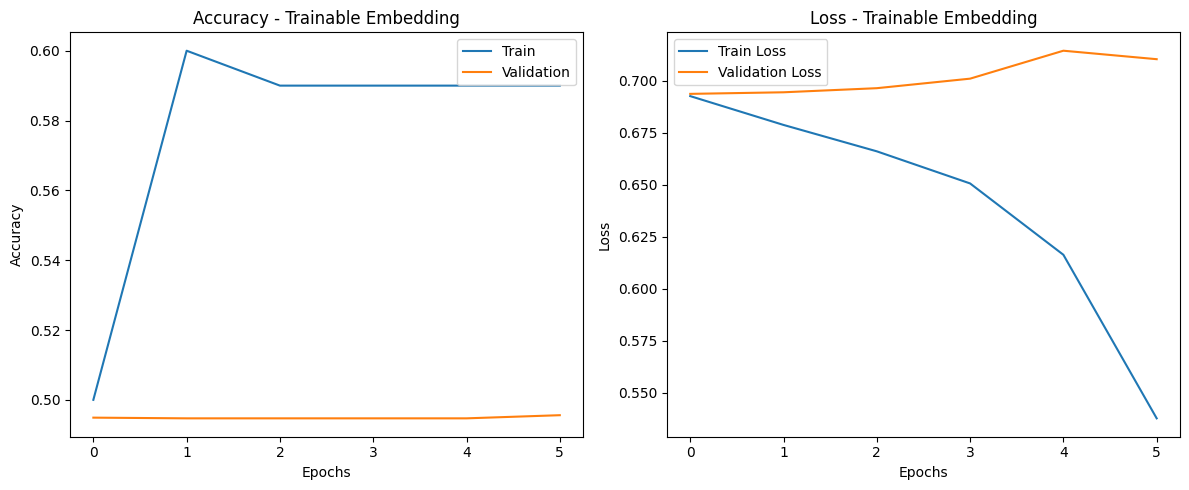

📥 Downloading GloVe vectors...
✅ GloVe vectors ready!
Loaded 400000 word vectors.
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6192 - loss: 0.6737 - val_accuracy: 0.4947 - val_loss: 0.7249
Epoch 2/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.6324 - loss: 0.6500 - val_accuracy: 0.4951 - val_loss: 0.7160
Epoch 3/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.6251 - loss: 0.6307 - val_accuracy: 0.4954 - val_loss: 0.7062
Epoch 4/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6059 - loss: 0.6379 - val_accuracy: 0.4946 - val_loss: 0.7093
Epoch 5/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.6939 - loss: 0.6280 - val_accuracy: 0.4946 - val_loss: 0.7147
Epoch 6/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6886 - loss: 0.5869 - val_accuracy: 0.4937 - val_loss: 0.7182

Test Accuracy (Pretrained GloVe): 0.500


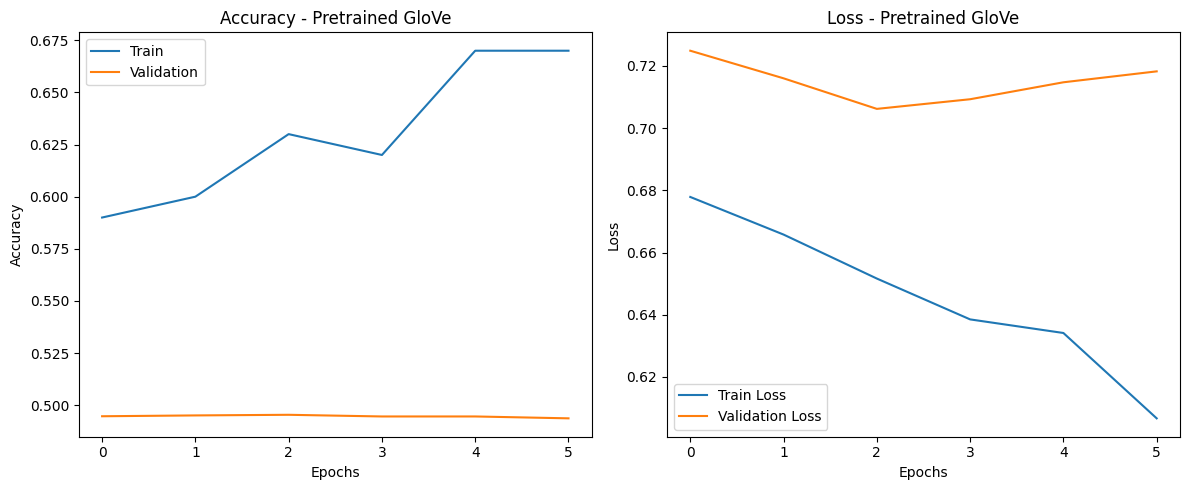


--- FINAL COMPARISON ---
Trainable Embedding Accuracy : 0.502
Pretrained GloVe Accuracy     : 0.500
✅ Trainable embedding worked better in this setup.


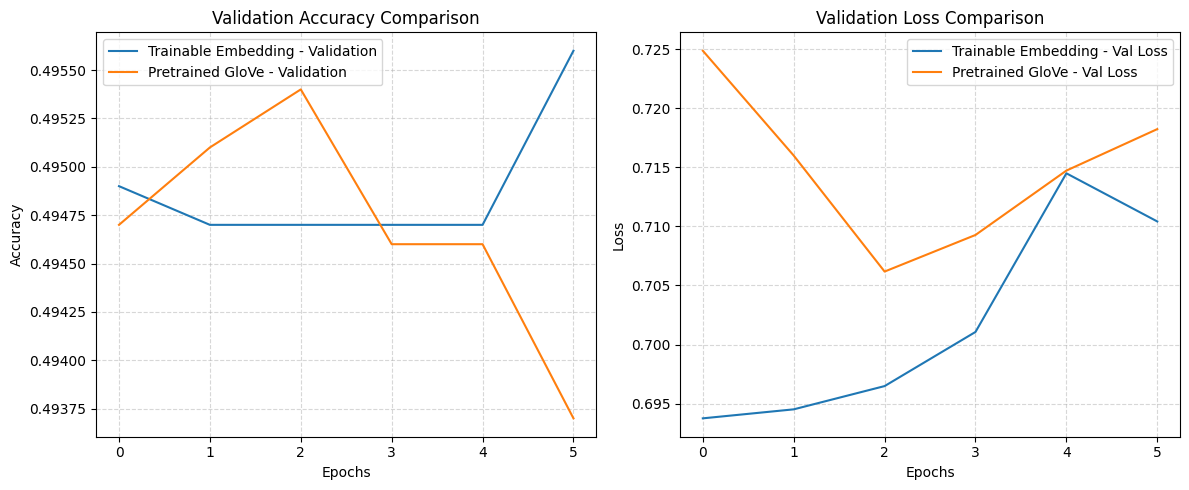

/tmp/ipython-input-3846799781.py:194: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=acc_values, palette='pastel')


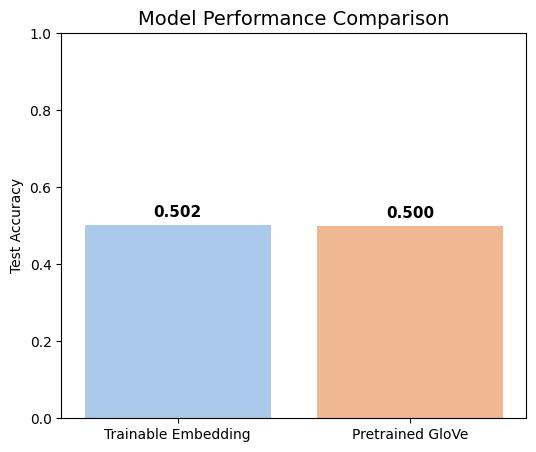

782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step


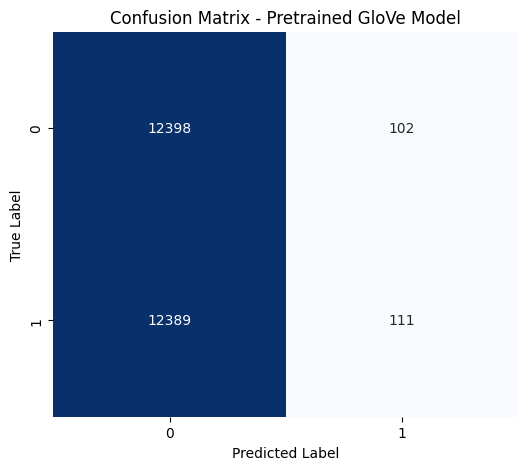


Classification Report - Pretrained GloVe Model:
              precision    recall  f1-score   support

    Negative       0.50      0.99      0.67     12500
    Positive       0.52      0.01      0.02     12500

    accuracy                           0.50     25000
   macro avg       0.51      0.50      0.34     25000
weighted avg       0.51      0.50      0.34     25000



In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, zipfile, urllib.request, random
from sklearn.metrics import confusion_matrix, classification_report

#  Set random seeds for reproducibility

tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)


#  Load and preprocess IMDB dataset

vocab_size = 10000
max_length = 150
train_limit = 100

# Load dataset (only top 10,000 words)
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

# Pad/truncate reviews
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, maxlen=max_length)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, maxlen=max_length)

# Validation: 10,000 samples
x_val = train_data[:10000]
y_val = train_labels[:10000]
x_train = train_data[10000:10000 + train_limit]
y_train = train_labels[10000:10000 + train_limit]

print(f"Training samples: {len(x_train)} | Validation samples: {len(x_val)}")


#  Define helper function for plotting

def plot_history(history, title):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'Accuracy - {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss - {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()


#  Model 1 - LSTM with trainable Embedding

embedding_dim = 64

model_embed = models.Sequential([
    layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    layers.Bidirectional(layers.LSTM(32)),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

model_embed.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_embed = model_embed.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=6, batch_size=16, verbose=1
)

test_acc_embed = model_embed.evaluate(test_data, test_labels, verbose=0)[1]
print(f"\nTest Accuracy (Trainable Embedding): {test_acc_embed:.3f}")
plot_history(history_embed, "Trainable Embedding")


# Load GloVe Embeddings

glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip = "glove.6B.zip"
glove_file = "glove.6B.100d.txt"

if not os.path.exists(glove_file):
    print("📥 Downloading GloVe vectors...")
    urllib.request.urlretrieve(glove_url, glove_zip)
    with zipfile.ZipFile(glove_zip, "r") as zip_ref:
        zip_ref.extract(glove_file)
    os.remove(glove_zip)
print("✅ GloVe vectors ready!")

embeddings_index = {}
with open(glove_file, encoding='utf-8') as f:
    for line in f:
        word, vec = line.split(maxsplit=1)
        embeddings_index[word] = np.fromstring(vec, dtype='float32', sep=' ')
print(f"Loaded {len(embeddings_index)} word vectors.")


#  Create GloVe embedding matrix

word_index = tf.keras.datasets.imdb.get_word_index()
reverse_word_index = {v + 3: k for k, v in word_index.items()}
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<UNK>"
reverse_word_index[3] = "<UNUSED>"

embedding_matrix = np.zeros((vocab_size, 100))
for word, i in word_index.items():
    if i < vocab_size:
        vector = embeddings_index.get(word)
        if vector is not None:
            embedding_matrix[i] = vector


#  Model 2 - LSTM with Pretrained (Frozen) GloVe Embeddings

model_glove = models.Sequential([
    layers.Embedding(vocab_size, 100, weights=[embedding_matrix],
                     input_length=max_length, trainable=False),
    layers.Bidirectional(layers.LSTM(32)),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

model_glove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_glove = model_glove.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=6, batch_size=16, verbose=1
)

test_acc_glove = model_glove.evaluate(test_data, test_labels, verbose=0)[1]
print(f"\nTest Accuracy (Pretrained GloVe): {test_acc_glove:.3f}")
plot_history(history_glove, "Pretrained GloVe")


#  Comparison Summary

print("\n--- FINAL COMPARISON ---")
print(f"Trainable Embedding Accuracy : {test_acc_embed:.3f}")
print(f"Pretrained GloVe Accuracy     : {test_acc_glove:.3f}")

if test_acc_glove > test_acc_embed:
    print("✅ Pretrained GloVe performed better with limited training data.")
else:
    print("✅ Trainable embedding worked better in this setup.")


# VISUALIZATIONS SECTION

def plot_training_curves(history1, history2, label1, label2):
    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history1.history['val_accuracy'], label=f'{label1} - Validation')
    plt.plot(history2.history['val_accuracy'], label=f'{label2} - Validation')
    plt.title("Validation Accuracy Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history1.history['val_loss'], label=f'{label1} - Val Loss')
    plt.plot(history2.history['val_loss'], label=f'{label2} - Val Loss')
    plt.title("Validation Loss Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# Combined plots
plot_training_curves(history_embed, history_glove,
                     "Trainable Embedding", "Pretrained GloVe")

# Bar chart comparison
acc_values = [test_acc_embed, test_acc_glove]
labels = ["Trainable Embedding", "Pretrained GloVe"]

plt.figure(figsize=(6,5))
sns.barplot(x=labels, y=acc_values, palette='pastel')
plt.title("Model Performance Comparison", fontsize=14)
plt.ylabel("Test Accuracy")
plt.ylim(0, 1)
for i, val in enumerate(acc_values):
    plt.text(i, val + 0.02, f"{val:.3f}", ha='center', fontsize=11, fontweight='bold')
plt.show()

# Confusion matrix for best model (GloVe)
y_pred = (model_glove.predict(test_data) > 0.5).astype("int32").flatten()
cm = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Pretrained GloVe Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report
print("\nClassification Report - Pretrained GloVe Model:")
print(classification_report(test_labels, y_pred, target_names=['Negative', 'Positive']))


Training pool size available: 15000

=== Training with 100 samples ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.4927 - loss: 0.6935 - val_accuracy: 0.4946 - val_loss: 0.6936
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6727 - loss: 0.6836 - val_accuracy: 0.4948 - val_loss: 0.6939
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.6676 - loss: 0.6761 - val_accuracy: 0.4948 - val_loss: 0.6942
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.5677 - loss: 0.6961 - val_accuracy: 0.4948 - val_loss: 0.7271
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.6164 - loss: 0.6392 - val_accuracy: 0.4967 - val_loss: 0.7108
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6336 - loss: 0.6570 - val_accuracy: 0.5011 - val_loss: 0.7024
→ Trainable=0.500,  GloVe=0.507

=== Training with 500 samples ===
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 624ms/step - accuracy: 0.5592 - loss: 0.6928 - val_accuracy: 0.4953 - val_loss: 0.6926
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 594ms/step - accuracy: 0.5615

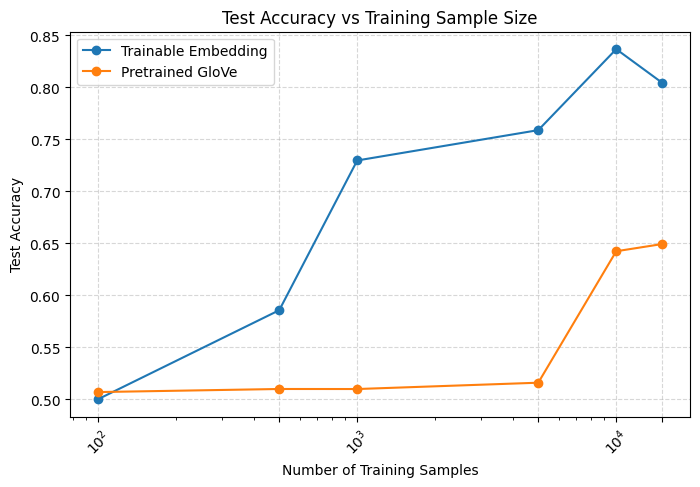


Summary results:
Size=   100 | Trainable=0.5002 | GloVe=0.5070
Size=   500 | Trainable=0.5858 | GloVe=0.5100
Size=  1000 | Trainable=0.7297 | GloVe=0.5100
Size=  5000 | Trainable=0.7589 | GloVe=0.5160
Size= 10000 | Trainable=0.8368 | GloVe=0.6424
Size= 15000 | Trainable=0.8046 | GloVe=0.6493


In [ ]:

# PART 2 — SAMPLE SIZE SWEEP EXPERIMENT


import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models
import gc

# --- Parameters ---
vocab_size = 10000
max_length = 150
train_pool = train_data[10000:]
label_pool = np.array(train_labels)[10000:]
max_available = len(train_pool)
print(f"Training pool size available: {max_available}")

sample_sizes = [100, 500, 1000, 5000, 10000, max_available]
epochs_per_run = 3
batch_size = 32

# --- Model Builders ---
def make_trainable_embed_model(vocab_size=vocab_size, emb_dim=64, maxlen=max_length):
    model = models.Sequential([
        layers.Embedding(vocab_size, emb_dim, input_length=maxlen),
        layers.Bidirectional(layers.LSTM(32)),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def make_glove_model(embedding_matrix, vocab_size=vocab_size, emb_dim=100, maxlen=max_length):
    model = models.Sequential([
        layers.Embedding(vocab_size, emb_dim, weights=[embedding_matrix],
                         input_length=maxlen, trainable=False),
        layers.Bidirectional(layers.LSTM(32)),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Training Loop ---
results = {'size': [], 'trainable_test_acc': [], 'glove_test_acc': []}

for size in sample_sizes:
    if size > max_available:
        continue
    print(f"\n=== Training with {size} samples ===")
    x_train_small = train_pool[:size]
    y_train_small = label_pool[:size]

    tf.keras.backend.clear_session()
    model_t = make_trainable_embed_model()
    model_t.fit(x_train_small, y_train_small, validation_data=(x_val, y_val),
                epochs=epochs_per_run, batch_size=batch_size, verbose=1)
    test_acc_t = model_t.evaluate(test_data, test_labels, verbose=0)[1]

    tf.keras.backend.clear_session()
    model_g = make_glove_model(embedding_matrix)
    model_g.fit(x_train_small, y_train_small, validation_data=(x_val, y_val),
                epochs=epochs_per_run, batch_size=batch_size, verbose=1)
    test_acc_g = model_g.evaluate(test_data, test_labels, verbose=0)[1]

    results['size'].append(size)
    results['trainable_test_acc'].append(test_acc_t)
    results['glove_test_acc'].append(test_acc_g)

    print(f"→ Trainable={test_acc_t:.3f},  GloVe={test_acc_g:.3f}")

    del model_t, model_g
    gc.collect()

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(results['size'], results['trainable_test_acc'], marker='o', label='Trainable Embedding')
plt.plot(results['size'], results['glove_test_acc'], marker='o', label='Pretrained GloVe')
plt.xlabel('Number of Training Samples')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Training Sample Size')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xscale('log')
plt.xticks(results['size'], rotation=45)
plt.show()

# --- Summary ---
print("\nSummary results:")
for s, t_acc, g_acc in zip(results['size'], results['trainable_test_acc'], results['glove_test_acc']):
    print(f"Size={s:6d} | Trainable={t_acc:.4f} | GloVe={g_acc:.4f}")
